In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
temp=pd.read_csv("C:\\Users\\CVR\\Desktop\\22B81A66B9\\temp\\GlobalLandTemperaturesByCity.csv")
temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [71]:
temp['dt'] = pd.to_datetime(temp['dt'])
temp.dtypes

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
City                                     object
Country                                  object
Latitude                                 object
Longitude                                object
dtype: object

In [72]:
temp['AverageTemperature']=temp['AverageTemperature'].fillna(temp['AverageTemperature'].mean())
temp.head()
temp.isna().sum()

dt                                    0
AverageTemperature                    0
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64

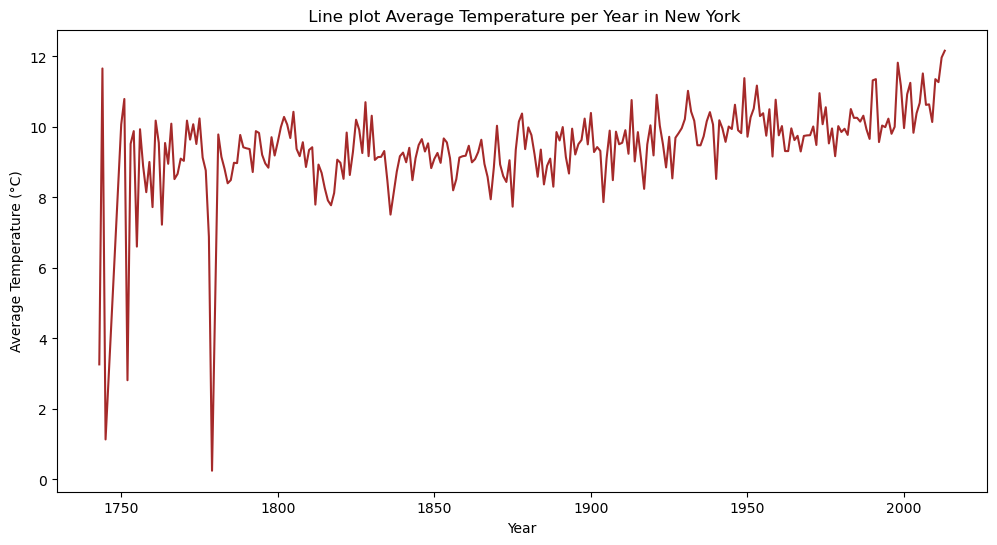

In [82]:
city = temp[temp['City'] == 'New York'].copy()
city['dt'] = pd.to_datetime(city['dt'], errors='coerce')
city['Year'] = city['dt'].dt.year
aveg = city.groupby('Year')['AverageTemperature'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(aveg['Year'], aveg['AverageTemperature'], color='brown')
plt.title(" Line plot Average Temperature per Year in New York")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.show()


C:\Users\CVR\AppData\Local\Temp\ipykernel_16268\2685006128.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_country['AverageTemperature']=temp_country['AverageTemperature'].fillna(temp_country['AverageTemperature'].mean())


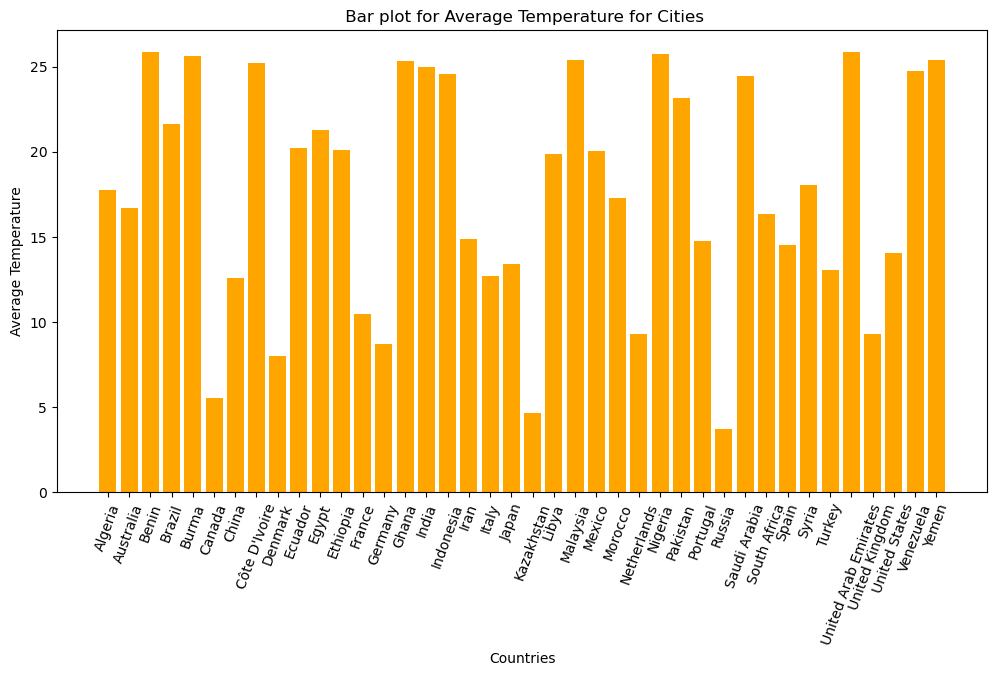

In [62]:
import matplotlib.pyplot as plt
countries=temp['Country'].unique()[:40]
temp_country=temp[temp['Country'].isin(countries)]
temp_country['AverageTemperature']=temp_country['AverageTemperature'].fillna(temp_country['AverageTemperature'].mean())
temp_city = temp_country.groupby('Country')['AverageTemperature'].mean()
plt.figure(figsize=(12,6))
plt.bar(temp_city.index,temp_city.values , color='orange' )
plt.xlabel('Countries')
plt.ylabel('Average Temperature')
plt.title(' Bar plot for Average Temperature for Cities')
plt.xticks(rotation=70)
plt.show()

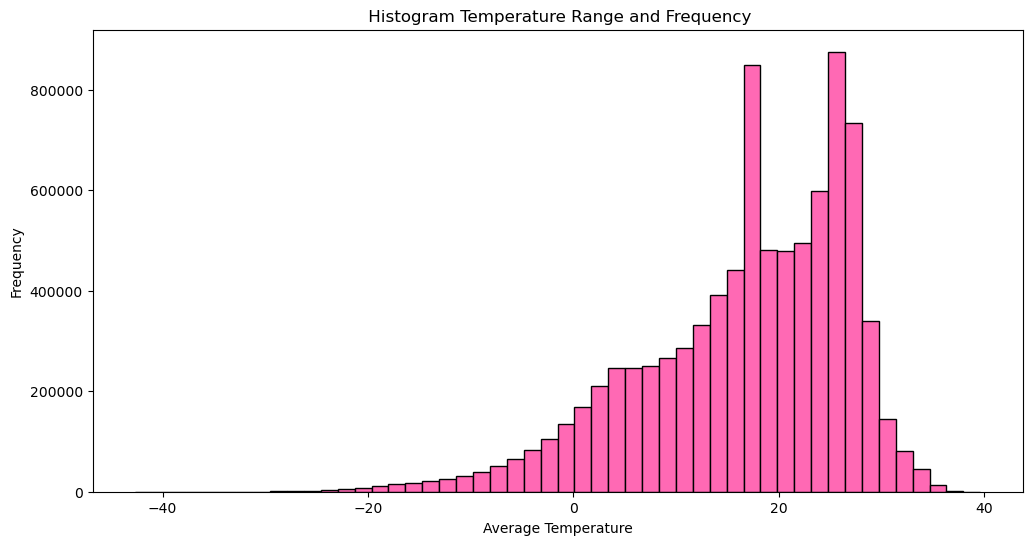

In [63]:
temdata=temp['AverageTemperature']
plt.figure(figsize=(12, 6))
plt.hist(temp['AverageTemperature'], bins=50, color='hotpink', edgecolor='black')
plt.title(' Histogram Temperature Range and Frequency')
plt.xlabel('Average Temperature')
plt.ylabel('Frequency')
plt.show()

In [73]:
temp=temp.dropna()

In [75]:
temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E


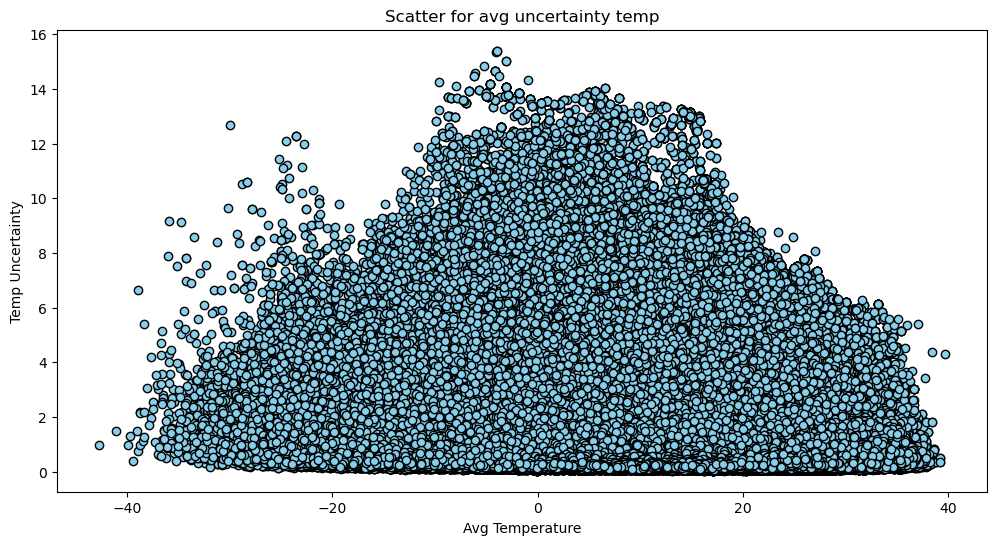

In [81]:
plt.figure(figsize=(12, 6))
plt.scatter(temp['AverageTemperature'],temp['AverageTemperatureUncertainty'],color='skyblue',edgecolor='black' )
plt.title("Scatter for avg uncertainty temp" )
plt.xlabel("Avg Temperature")
plt.ylabel("Temp Uncertainty")
plt.show()

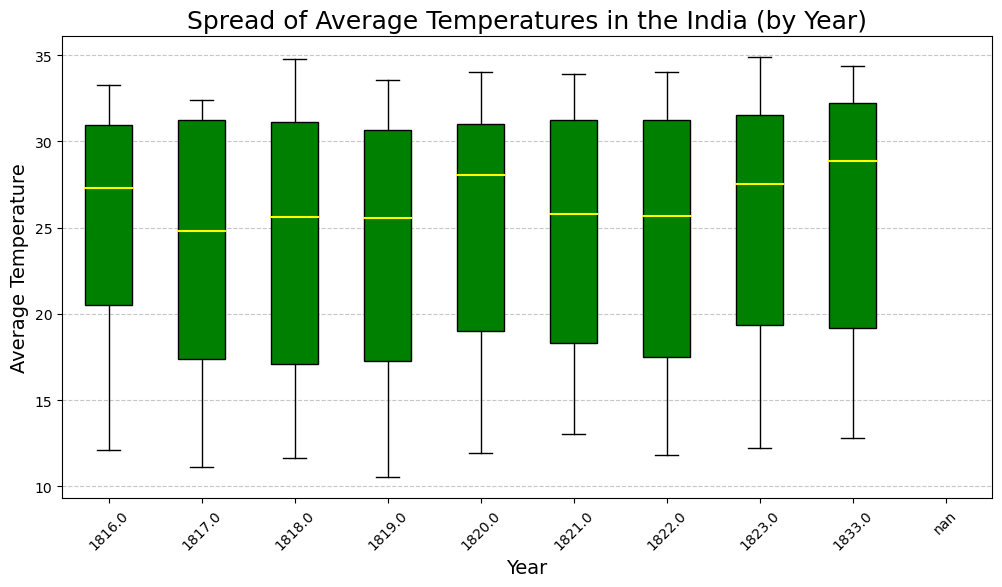

In [85]:
import matplotlib.pyplot as plt
country_data = temp[temp['Country'] == 'India'].dropna()
country_data['Year'] = pd.to_datetime(country_data['dt']).dt.year.head(100)
temperature_data = country_data[['Year', 'AverageTemperature']]
plt.figure(figsize=(12, 6))
plt.boxplot(
    [temperature_data[temperature_data['Year'] == year]['AverageTemperature'] for year in temperature_data['Year'].unique()],
    labels=temperature_data['Year'].unique(),
    patch_artist=True,
    boxprops=dict(facecolor='green', color='black'),
    medianprops=dict(color='yellow', linewidth=1.5),
    flierprops=dict(marker='o', color='red', alpha=0.5),
)

plt.title('Spread of Average Temperatures in the India (by Year)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Temperature', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
